In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)



In [2]:
scores = np.load("fuzzy_scores.npy")
y_true = np.load("y_true.npy")

print("Loaded scores:", scores.shape)


Loaded scores: (30000,)


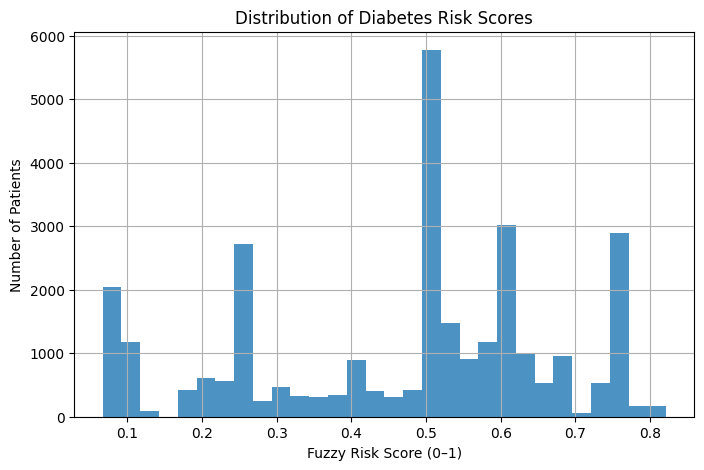

In [3]:
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=30, alpha=0.8)
plt.xlabel("Fuzzy Risk Score (0–1)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Diabetes Risk Scores")
plt.grid(True)
plt.show()


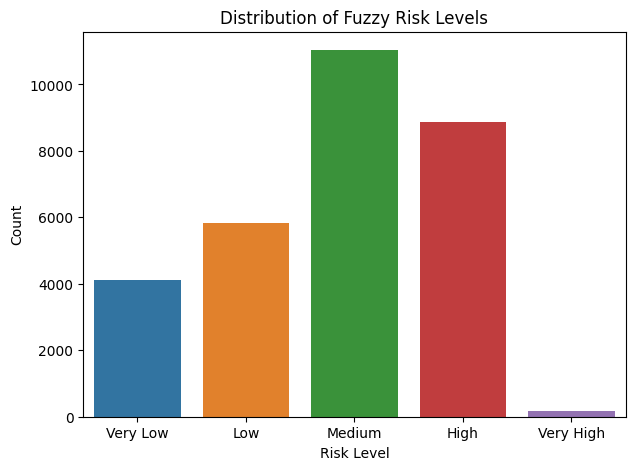

In [4]:
def risk_level(score):
    if score < 0.2:
        return "Very Low"
    elif score < 0.4:
        return "Low"
    elif score < 0.6:
        return "Medium"
    elif score < 0.8:
        return "High"
    else:
        return "Very High"

risk_levels = [risk_level(s) for s in scores]

plt.figure(figsize=(7, 5))
sns.countplot(x=risk_levels, order=["Very Low", "Low", "Medium", "High", "Very High"])
plt.title("Distribution of Fuzzy Risk Levels")
plt.ylabel("Count")
plt.xlabel("Risk Level")
plt.show()


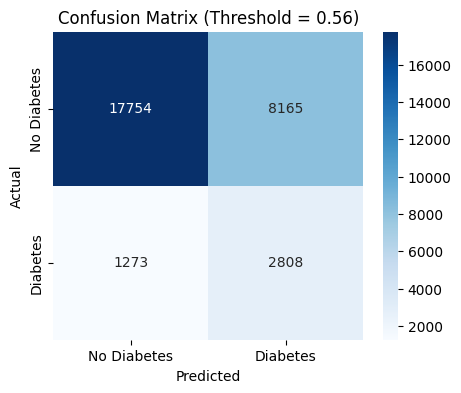

In [5]:
threshold = 0.56  # your final chosen threshold
y_pred = (scores >= threshold).astype(int)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Diabetes", "Diabetes"],
    yticklabels=["No Diabetes", "Diabetes"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.56)")
plt.show()


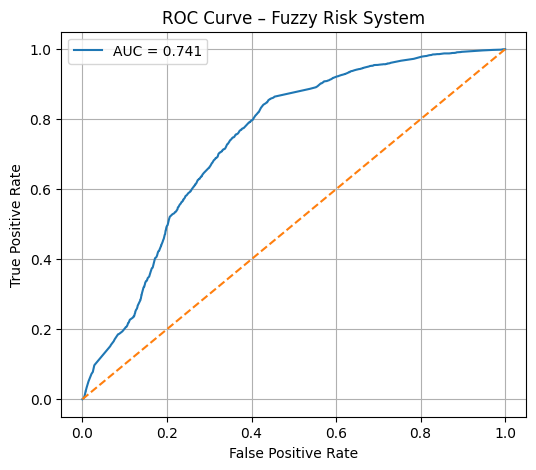

In [6]:
fpr, tpr, _ = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Fuzzy Risk System")
plt.legend()
plt.grid(True)
plt.show()


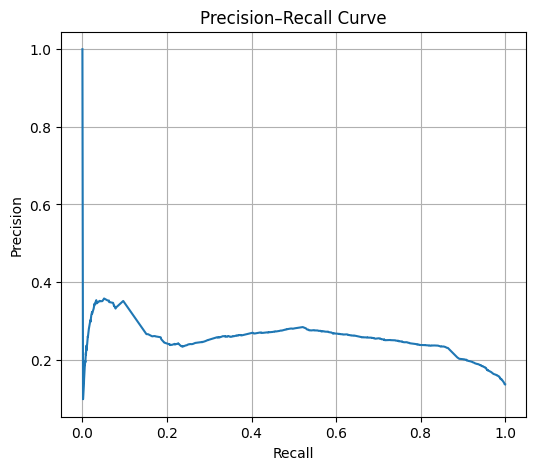

In [7]:
precision, recall, _ = precision_recall_curve(y_true, scores)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid(True)
plt.show()
